In [7]:
import os

file_path = r"C:\Users\user\Downloads\Amazon\cleaned_test.csv"

if os.path.exists(file_path):
    print("✅ File ditemukan, lanjut membaca...")
    df = pd.read_csv(file_path)
    print(df.info())
    print(df.head())
else:
    print("❌ File tidak ditemukan! Periksa kembali lokasi file.")

✅ File ditemukan, lanjut membaca...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11399 entries, 0 to 11398
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           11399 non-null  object 
 1   Delivery_person_ID           11399 non-null  object 
 2   Delivery_person_Age          10908 non-null  float64
 3   Delivery_person_Ratings      10892 non-null  float64
 4   Restaurant_latitude          11399 non-null  float64
 5   Restaurant_longitude         11399 non-null  float64
 6   Delivery_location_latitude   11399 non-null  float64
 7   Delivery_location_longitude  11399 non-null  float64
 8   Order_Date                   11399 non-null  object 
 9   Time_Orderd                  10955 non-null  object 
 10  Time_Order_picked            11399 non-null  object 
 11  Weather                      11241 non-null  object 
 12  Road_traffic_density         11245 non

In [15]:
# 1. Supervised Learning (Regresi & Klasifikasi)
# A. Regresi - Prediksi Waktu Pengiriman

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os

# Pastikan file ada sebelum membaca
file_path = r"C:\Users\user\Downloads\Amazon\cleaned_test.csv"
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print("✅ File berhasil dimuat.")
else:
    raise FileNotFoundError(f"⚠️ File '{file_path}' tidak ditemukan! Harap unggah terlebih dahulu.")

# Cek apakah kolom 'Order_Date'
# Konversi 'Order_Date' ke format datetime dengan dayfirst=True
if 'Order_Date' in df.columns:
    df['Order_Date'] = pd.to_datetime(df['Order_Date'], dayfirst=True)  
    print("📅 Kolom 'Order_Date' berhasil dikonversi ke datetime.")
else:
    print("⚠️ Kolom 'Order_Date' tidak ditemukan dalam dataset!")
    

# Hapus missing values
df = df.dropna()

# Pilih fitur dan target (pastikan target tersedia)
features = [
    'Restaurant_latitude', 'Restaurant_longitude', 
    'Delivery_location_latitude', 'Delivery_location_longitude', 
    'Vehicle_condition'
]
target = 'Delivery_person_Ratings'  # Sesuaikan jika target berbeda

# Pastikan target ada di dataset
if target not in df.columns:
    raise KeyError(f"⚠️ Kolom target '{target}' tidak ditemukan dalam dataset!")

# Pastikan hanya mengambil fitur numerik
X = df[features].select_dtypes(include=[np.number])  
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Model Prediction
y_pred = model.predict(X_test_scaled)

# Evaluasi Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print hasil evaluasi
print("\n📊 Evaluasi Model:")
print(f"🔹 MAE: {mae}")
print(f"🔹 MSE: {mse}")
print(f"🔹 R² Score: {r2}")


✅ File berhasil dimuat.
📅 Kolom 'Order_Date' berhasil dikonversi ke datetime.

📊 Evaluasi Model:
🔹 MAE: 0.268739698727769
🔹 MSE: 0.13791466831831217
🔹 R² Score: -0.1745760871662403


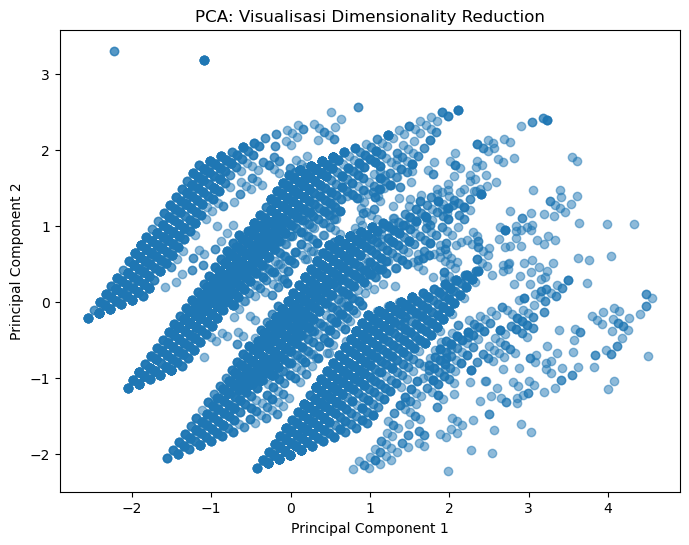

In [ ]:
#2 Unsupervised Learning: Dimensionality Reduction & Clustering
#Dimensionality Reduction (PCA)

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"C:\Users\user\Downloads\Amazon\cleaned_test.csv") 

# Pilih fitur numerik untuk PCA
features = ["Delivery_person_Age", "Delivery_person_Ratings", "Vehicle_condition", "multiple_deliveries"]
df_pca = df[features].dropna()

# Standarisasi data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_pca)

# PCA dengan 2 komponen utama
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Visualisasi hasil PCA
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0], pca_result[:,1], alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: Visualisasi Dimensionality Reduction")
plt.show()


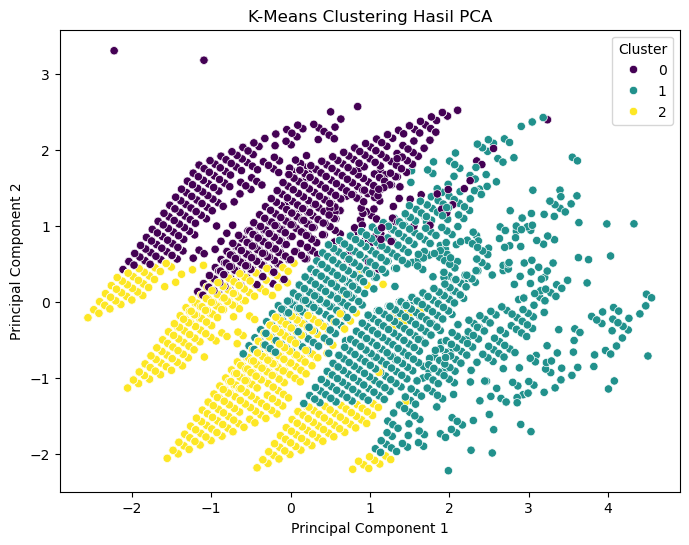

In [39]:
#b. Clustering (K-Means)
from sklearn.cluster import KMeans
import seaborn as sns

# Load dataset
df = pd.read_csv(r"C:\Users\user\Downloads\Amazon\cleaned_test.csv") 

# Terapkan K-Means dengan 3 cluster
kmeans = KMeans(n_clusters=3, random_state=42)
df_pca["Cluster"] = kmeans.fit_predict(df_scaled)

# Visualisasi clustering
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=df_pca["Cluster"], palette="viridis")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering Hasil PCA")
plt.legend(title="Cluster")
plt.show()


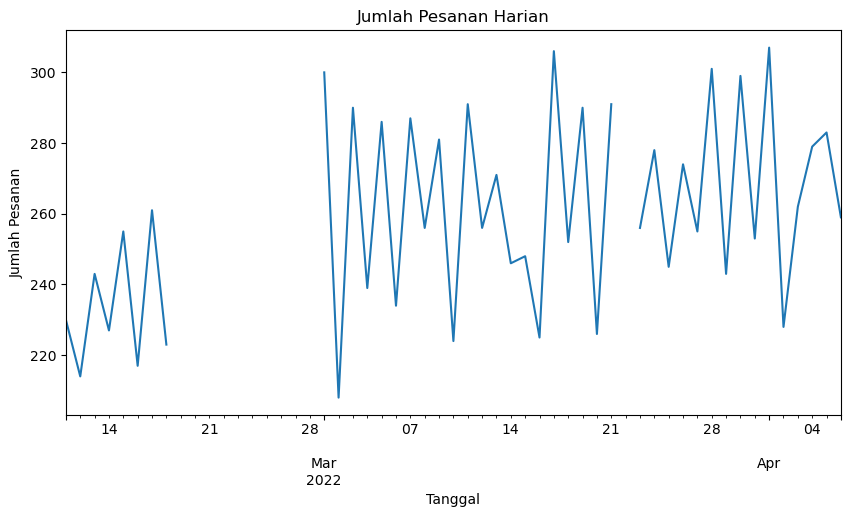

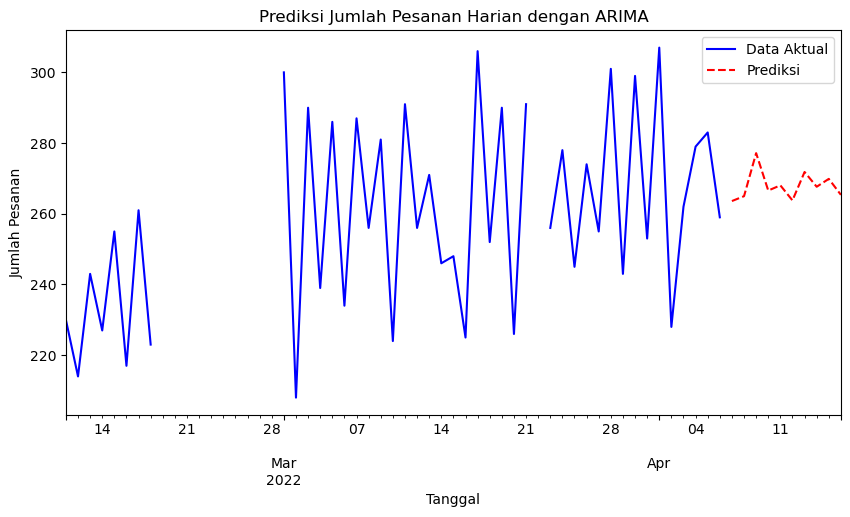

In [40]:
#3 Time Series Modeling: Forecasting

import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Load dataset
df = pd.read_csv(r"C:\Users\user\Downloads\Amazon\cleaned_test.csv") 

# ✅ Konversi Order_Date ke datetime dengan dayfirst=True
df["Order_Date"] = pd.to_datetime(df["Order_Date"], dayfirst=True)

# ✅ Hitung jumlah pesanan per hari
df_orders = df.groupby("Order_Date").size()

# ✅ Atur indeks dengan frekuensi harian (penting untuk ARIMA)
df_orders = df_orders.asfreq("D")

# ✅ Plot data historis
plt.figure(figsize=(10, 5))
df_orders.plot()
plt.title("Jumlah Pesanan Harian")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Pesanan")
plt.show()

# ✅ Model ARIMA dengan parameter (p, d, q)
model = ARIMA(df_orders, order=(5,1,0))  # Sesuaikan parameter jika perlu
model_fit = model.fit()

# ✅ Prediksi 10 hari ke depan
forecast_index = pd.date_range(start=df_orders.index[-1] + pd.Timedelta(days=1), periods=10, freq="D")
forecast = pd.Series(model_fit.forecast(steps=10), index=forecast_index)

# ✅ Plot hasil prediksi
plt.figure(figsize=(10, 5))
df_orders.plot(label="Data Aktual", color="blue")
forecast.plot(label="Prediksi", linestyle="dashed", color="red")
plt.legend()
plt.title("Prediksi Jumlah Pesanan Harian dengan ARIMA")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Pesanan")
plt.show()


In [41]:
#4. Ensemble Learning: Regresi & Klasifikasi
#a. Regresi: Memprediksi Waktu Pengiriman
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Load dataset
df = pd.read_csv(r"C:\Users\user\Downloads\Amazon\cleaned_test.csv") 
# Pilih fitur dan target
features = ["Delivery_person_Age", "Delivery_person_Ratings", "Vehicle_condition", "multiple_deliveries"]
target = "Time_Order_picked"

# ✅ Pastikan tidak ada NaN di target sebelum konversi
df = df.dropna(subset=[target])

# ✅ Ubah 'Time_Order_picked' ke menit total
def convert_time_to_minutes(time_str):
    try:
        hour, minute = map(int, time_str.split(":"))
        return hour * 60 + minute
    except ValueError:
        return np.nan  # Tandai sebagai NaN jika format salah

df[target] = df[target].astype(str).apply(convert_time_to_minutes)

# ✅ Hapus data yang memiliki nilai NaN setelah konversi
df_reg = df[features + [target]].dropna()

# 🚨 Tambahkan validasi jika df_reg kosong
if df_reg.empty:
    print("⚠️ ERROR: Data kosong setelah preprocessing. Cek kembali input dataset!")
else:
    # ✅ Split data
    X_train, X_test, y_train, y_test = train_test_split(df_reg[features], df_reg[target], test_size=0.2, random_state=42)

    # ✅ Train model
    regressor = RandomForestRegressor(n_estimators=100, random_state=42)
    regressor.fit(X_train, y_train)

    # ✅ Prediksi dan evaluasi
    y_pred = regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"✅ MAE (Random Forest Regressor): {mae}")


✅ MAE (Random Forest Regressor): 228.33441442733118


In [ ]:
#b. Klasifikasi: Apakah Pesanan Akan Terlambat?
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# ✅ Load dataset
df = pd.read_csv(r"C:\Users\user\Downloads\Amazon\cleaned_test.csv") 

# ✅ Fungsi untuk konversi waktu (HH:MM) ke menit total
def convert_time_to_minutes(time_str):
    try:
        hour, minute = map(int, time_str.split(":"))
        return hour * 60 + minute  # Konversi ke total menit
    except ValueError:
        return np.nan  # Jika format salah, beri NaN

# ✅ Konversi 'Time_Order_picked' ke menit total
df["Time_Order_picked"] = df["Time_Order_picked"].astype(str).apply(convert_time_to_minutes)

# ✅ Hapus nilai NaN setelah konversi
df = df.dropna(subset=["Time_Order_picked"])

# ✅ Ubah ambang batas keterlambatan ke menit total (19:00 = 1140 menit)
df["Late_Delivery"] = (df["Time_Order_picked"] > 1140).astype(int)

# ✅ Pastikan fitur sesuai dengan regresi
features = ["Delivery_person_Age", "Delivery_person_Ratings", "Vehicle_condition", "multiple_deliveries"]

# ✅ Pilih fitur dan target
target_class = "Late_Delivery"
df_class = df[features + [target_class]].dropna()

# 🚨 Tambahkan validasi jika df_class kosong
if df_class.empty:
    print("⚠️ ERROR: Data kosong setelah preprocessing. Cek kembali dataset!")
else:
    # ✅ Split data
    X_train, X_test, y_train, y_test = train_test_split(df_class[features], df_class[target_class], test_size=0.2, random_state=42)

    # ✅ Train model
    classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    classifier.fit(X_train, y_train)

    # ✅ Prediksi dan evaluasi
    y_pred_class = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_class)

    print(f"✅ Akurasi Model Klasifikasi: {accuracy:.2f}")


✅ Akurasi Model Klasifikasi: 0.51


In [57]:
#Recommender System : implementasi recommender system

import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# 🔹 Contoh dataset restoran (jika ingin membuatnya langsung dalam script tanpa CSV)
data = {
    "Name": [
        "KFC", "McDonald's", "Burger King", "Pizza Hut", "Domino's", "Subway",
        "KFC", "McDonald's", "Burger King", "Pizza Hut", "Domino's", "Subway",
        "Starbucks", "Dunkin'", "Taco Bell"
    ],
    "Delivery_person_Ratings": [
        4.5, 4.2, 4.3, 4.1, 4.0, 4.6,
        4.7, 4.0, 4.1, 4.3, 4.2, 4.5,
        4.8, 4.0, 3.9
    ]
}

# ✅ Buat DataFrame
df = pd.DataFrame(data)

# ✅ Bersihkan nama kolom (hapus spasi)
df.columns = df.columns.str.strip()

# ✅ Pastikan kolom yang dibutuhkan ada dalam dataset
required_columns = {"Name", "Delivery_person_Ratings"}
missing_columns = required_columns - set(df.columns)
if missing_columns:
    raise ValueError(f"Kolom berikut tidak ditemukan dalam dataset: {missing_columns}")

# ✅ Buat tabel restoran berdasarkan jumlah pesanan & rating
restaurant_orders = df.groupby("Name").agg(
    Total_Orders=("Name", "count"),
    Avg_Rating=("Delivery_person_Ratings", "mean")  # Rata-rata rating restoran
).reset_index()

# ✅ Tangani NaN di "Total_Orders" dan "Avg_Rating"
restaurant_orders["Total_Orders"] = restaurant_orders["Total_Orders"].fillna(0)

# Jika tidak ada rating, gunakan rata-rata dari seluruh restoran
if restaurant_orders["Avg_Rating"].isna().all():
    restaurant_orders["Avg_Rating"] = 3.0  # Default rating jika semua NaN
else:
    restaurant_orders["Avg_Rating"] = restaurant_orders["Avg_Rating"].fillna(restaurant_orders["Avg_Rating"].mean())

# ✅ Normalisasi data sebelum cosine similarity
min_orders, max_orders = restaurant_orders["Total_Orders"].min(), restaurant_orders["Total_Orders"].max()
min_rating, max_rating = restaurant_orders["Avg_Rating"].min(), restaurant_orders["Avg_Rating"].max()

restaurant_orders["Total_Orders_Norm"] = (
    (restaurant_orders["Total_Orders"] - min_orders) / (max_orders - min_orders)
    if max_orders != min_orders else 1
)
restaurant_orders["Avg_Rating_Norm"] = (
    (restaurant_orders["Avg_Rating"] - min_rating) / (max_rating - min_rating)
    if max_rating != min_rating else 1
)

# ✅ Gabungkan fitur untuk perhitungan kesamaan
restaurant_orders["Similarity_Feature"] = (
    restaurant_orders["Total_Orders_Norm"] * 0.5 + restaurant_orders["Avg_Rating_Norm"] * 0.5
)

# ✅ Pastikan dataset memiliki cukup data untuk perhitungan similarity
if len(restaurant_orders) < 2:
    raise ValueError("Dataset memiliki terlalu sedikit restoran untuk menghitung kemiripan.")

# ✅ Gunakan cosine similarity
similarity_matrix = cosine_similarity(restaurant_orders[["Similarity_Feature"]])

# ✅ Fungsi untuk mencari restoran yang mirip berdasarkan nama yang mendekati
def find_closest_restaurant(name):
    matches = restaurant_orders[restaurant_orders["Name"].str.contains(name, case=False, na=False)]
    return matches["Name"].tolist()

# ✅ Fungsi rekomendasi restoran
def recommend_restaurant(restaurant_name, top_n=3):
    # Coba cari restoran dengan nama yang mendekati
    possible_matches = find_closest_restaurant(restaurant_name)
    
    if not possible_matches:
        return f"⚠️ Restoran '{restaurant_name}' tidak ditemukan dalam data. Coba salah satu dari: {restaurant_orders['Name'].sample(min(5, len(restaurant_orders))).tolist()}"

    # Ambil restoran pertama yang cocok
    restaurant_name = possible_matches[0]
    
    # Dapatkan indeks restoran
    index_list = restaurant_orders.index[restaurant_orders["Name"] == restaurant_name].tolist()
    if not index_list:
        return f"⚠️ Restoran '{restaurant_name}' tidak ditemukan."
    
    index = index_list[0]  # Ambil indeks pertama
    
    # Urutkan berdasarkan kesamaan (hindari restoran itu sendiri)
    similar_indexes = np.argsort(similarity_matrix[index])[-(top_n + 1):-1][::-1]
    
    # Ambil nama restoran yang direkomendasikan
    recommendations = restaurant_orders.iloc[similar_indexes]["Name"].values
    
    return recommendations if len(recommendations) > 0 else "Tidak ada rekomendasi tersedia."

# ✅ Contoh rekomendasi restoran
restaurant_name_input = "KFC"
recommendations = recommend_restaurant(restaurant_name_input)
print(f"Rekomendasi restoran untuk '{restaurant_name_input}': {recommendations}")

# ✅ Menampilkan rekomendasi untuk beberapa restoran
for restaurant in restaurant_orders["Name"].sample(5, random_state=42):  # Ambil 5 restoran acak
    recommendations = recommend_restaurant(restaurant)
    print(f"Rekomendasi untuk '{restaurant}': {recommendations}")


Rekomendasi restoran untuk 'KFC': ['Starbucks' 'Pizza Hut' "McDonald's"]
Rekomendasi untuk 'Subway': ['Starbucks' 'Pizza Hut' "McDonald's"]
Rekomendasi untuk 'Domino's': ['Starbucks' 'Pizza Hut' "McDonald's"]
Rekomendasi untuk 'Pizza Hut': ['Starbucks' 'Pizza Hut' "McDonald's"]
Rekomendasi untuk 'Burger King': ['Starbucks' 'Pizza Hut' "McDonald's"]
Rekomendasi untuk 'Taco Bell': ['Subway' 'Starbucks' 'Pizza Hut']
